In [26]:
%reload_ext autoreload
%autoreload 2

import pickle

from utils.utils import split_csv

from preprocessing.cleaning import get_cleaned_data
from preprocessing.encoding import encode_data

from exploration.data_correlations import plot_correlations
from exploration.data_statistics import plot_labels_pie_chart, plot_blood_draw_statistics
from exploration.feature_selection_plots import plot_mrmr_and_rf
from exploration.midterm_exploration import plot_feature_against_diagnosis


from modeling.mrmr_feature_selection import plot_cutoffs
from modeling.logistic import run_logistic_regression, evaluate_logistic_regression
from modeling.RandomForest import run_random_forest, evaluate_random_forest
from modeling.mlp import run_mlp, evaluate_mlp
from modeling.comparisons import plot_f1_scores, plot_mci_f1_scores

## Constant for output locations

In [27]:
DATAFRAMES = "output/dataframes"
LOGS = "output/logs"
MODELS = "output/models"
PLOTS = "output/plots"

## Constants for the label

In [28]:
LABEL = "P1_PT_TYPE"
AD = 1
CN = 2
MCI = 4

## Clean, encode, and partition the data into blood, clinical, and combined dataframes

In [29]:
df = encode_data(get_cleaned_data())
combined, blood_only, clinical_only_mci = split_csv(df)
clinical_only = clinical_only_mci[clinical_only_mci[LABEL] != MCI]

## Plot some initial exploratory visualizations

In [ ]:
plot_labels_pie_chart(df, png=f"{PLOTS}/Diagnosis Pie Chart.png")

In [ ]:
plot_blood_draw_statistics(df, png=f"{PLOTS}/Blood Draw Statistics.png")

In [ ]:
plot_correlations(df)

In [ ]:
plot_feature_against_diagnosis(
    blood_only,
    "Q1_Total_tau",
    title="Total Tau Concentration by Diagnosis",
    ylabel="Total Tau Concentration (pg/mL)",
    png=f"{PLOTS}/Total Tau Concentration by Diagnosis.png"
)

In [ ]:
plot_feature_against_diagnosis(
    clinical_only,
    "C1_WMSR_DIGTOT",
    title="WMSR Digit Span Score by Diagnosis",
    ylabel="WMSR Digit Span Score",
    png=f"{PLOTS}/WMSR Digit Span Score by Diagnosis.png"
)

## Run MRMR feature selection to pick features for each of the partitions

100%|██████████| 327/327 [00:06<00:00, 54.37it/s] 


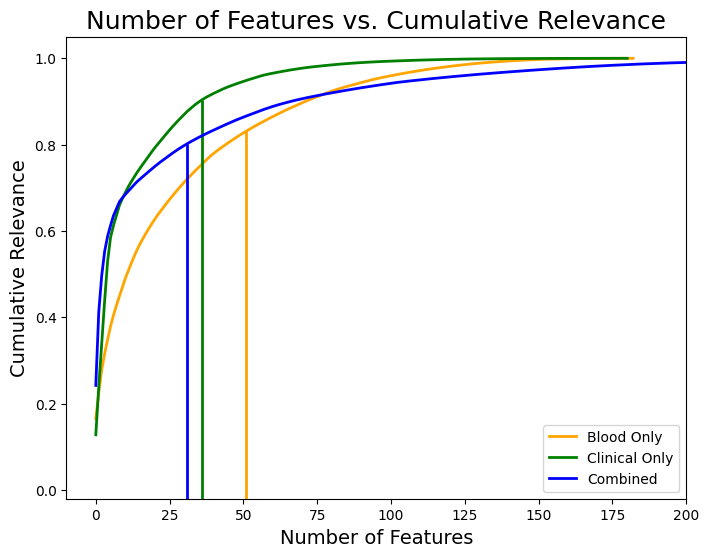

In [30]:
mrmr_output = plot_cutoffs(
    blood_only,
    clinical_only,
    combined,
    title="Number of Features vs. Cumulative Relevance",
    xlabel="Number of Features",
    ylabel="Cumulative Relevance",
    png=f"{PLOTS}/MRMR Curves"
)

blood_features = mrmr_output["blood"]["features"]
clinical_features = mrmr_output["clinical"]["features"]
combined_features = mrmr_output["combined"]["features"]

blood_mrmr_scores = mrmr_output["blood"]["relevances"]
clinical_mrmr_scores = mrmr_output["clinical"]["relevances"]
combined_mrmr_scores = mrmr_output["combined"]["relevances"]

blood_only_subset = blood_only[blood_features + [LABEL]]
clinical_only_subset = clinical_only[clinical_features + [LABEL]]
combined_subset = combined[combined_features + [LABEL]]
clinical_only_subset_mci = clinical_only_mci[clinical_features + [LABEL]]

## Run logistic regression on the entire feature set

In [ ]:
blood_lr_model = run_logistic_regression(blood_only, num_iters=20, pkl=f"{MODELS}/Blood Only LR.pkl")

In [10]:
blood_lr = evaluate_logistic_regression(f"{MODELS}/Blood Only LR.pkl")

Average micro-F1 score: 0.8352941176470591
Average confusion matrix:
[[48.65 10.65]
 [ 8.95 50.75]]


In [ ]:
clinical_lr_model = run_logistic_regression(clinical_only, num_iters=20, pkl=f"{MODELS}/Clinical Only LR.pkl")

In [5]:
clinical_lr = evaluate_logistic_regression(f"{MODELS}/Clinical Only LR.pkl")

Average micro-F1 score: 0.9717049319727892
Average confusion matrix:
[[ 928.1    38.9 ]
 [  27.65 1357.35]]


In [ ]:
combined_lr_model = run_logistic_regression(combined, num_iters=20, pkl=f"{MODELS}/Combined LR.pkl")

In [6]:
combined_lr = evaluate_logistic_regression(f"{MODELS}/Combined LR.pkl")

Average micro-F1 score: 0.9474789915966386
Average confusion matrix:
[[55.95  3.4 ]
 [ 2.85 56.8 ]]


## Run logistic regression on the features selected by MRMR

In [ ]:
blood_lr_mrmr_model = run_logistic_regression(blood_only_subset, num_iters=20, pkl=f"{MODELS}/Blood Only LR with MRMR.pkl")

In [11]:
blood_lr_mrmr = evaluate_logistic_regression(f"{MODELS}/Blood Only LR with MRMR.pkl")

Average micro-F1 score: 0.8134453781512606
Average confusion matrix:
[[47.2 11.7]
 [10.5 49.6]]


In [ ]:
clinical_lr_mrmr_model = run_logistic_regression(clinical_only_subset, num_iters=20, pkl=f"{MODELS}/Clinical Only LR with MRMR.pkl")

In [12]:
clinical_lr_mrmr = evaluate_logistic_regression(f"{MODELS}/Clinical Only LR with MRMR.pkl")

Average micro-F1 score: 0.9589498299319728
Average confusion matrix:
[[ 905.35   66.25]
 [  30.3  1350.1 ]]


In [ ]:
combined_lr_mrmr_model = run_logistic_regression(combined_subset, num_iters=20, pkl=f"{MODELS}/Combined LR with MRMR.pkl")

In [13]:
combined_lr_mrmr = evaluate_logistic_regression(f"{MODELS}/Combined LR with MRMR.pkl")

Average micro-F1 score: 0.9441176470588235
Average confusion matrix:
[[55.3   2.9 ]
 [ 3.75 57.05]]


## Run random forest

In [ ]:
blood_rf_model = run_random_forest(blood_only, num_iters=20, pkl=f"{MODELS}/Blood Only RF.pkl")

In [14]:
blood_rf = evaluate_random_forest(f"{MODELS}/Blood Only RF.pkl")

Average micro-F1 score: 0.8222689075630255
Average confusion matrix:
[[50.45  9.4 ]
 [11.75 47.4 ]]


In [ ]:
clinical_rf_model = run_random_forest(clinical_only, num_iters=20, pkl=f"{MODELS}/Clinical Only RF.pkl")

In [15]:
clinical_rf = evaluate_random_forest(f"{MODELS}/Clinical Only RF.pkl")

Average micro-F1 score: 0.9807185374149661
Average confusion matrix:
[[ 950.65   26.25]
 [  19.1  1356.  ]]


In [ ]:
combined_rf_model = run_random_forest(combined, num_iters=20, pkl=f"{MODELS}/Combined RF.pkl")

In [18]:
combined_rf = evaluate_random_forest(f"{MODELS}/Combined RF.pkl")

Average micro-F1 score: 0.9558823529411764
Average confusion matrix:
[[58.05  2.3 ]
 [ 2.95 55.7 ]]


## Run MLP on the entire feature set

In [ ]:
blood_mlp_model = run_mlp(blood_only, num_iters=20, pkl=f"{MODELS}/Blood Only MLP.pkl")

In [21]:
blood_mlp = evaluate_mlp(f"{MODELS}/Blood Only MLP.pkl")

Average micro-F1 score: 0.7764705882352944
Average confusion matrix:
[[47.55 12.4 ]
 [14.2  44.85]]


In [ ]:
clinical_mlp_model = run_mlp(clinical_only, num_iters=20, pkl=f"{MODELS}/Clinical Only MLP.pkl")

In [22]:
clinical_mlp = evaluate_mlp(f"{MODELS}/Clinical Only MLP.pkl")

Average micro-F1 score: 0.9709608843537415
Average confusion matrix:
[[ 939.     35.05]
 [  33.25 1344.7 ]]


In [ ]:
combined_mlp_model = run_mlp(combined, num_iters=20, pkl=f"{MODELS}/Combined MLP.pkl")

In [23]:
combined_mlp = evaluate_mlp(f"{MODELS}/Combined MLP.pkl")

Average micro-F1 score: 0.8836134453781515
Average confusion matrix:
[[52.3   7.15]
 [ 6.7  52.85]]


## Run MLP on the features selected by MRMR

In [ ]:
blood_mlp_mrmr_model = run_mlp(blood_only_subset, num_iters=20, pkl=f"{MODELS}/Blood Only MLP with MRMR.pkl")

In [31]:
blood_mlp_mrmr = evaluate_mlp(f"{MODELS}/Blood Only MLP with MRMR.pkl")

Average micro-F1 score: 0.8121848739495802
Average confusion matrix:
[[47.95 11.95]
 [10.4  48.7 ]]


In [ ]:
clinical_mlp_mrmr_model = run_mlp(clinical_only_subset, num_iters=20, pkl=f"{MODELS}/Clinical Only MLP with MRMR.pkl")

In [32]:
clinical_mlp_mrmr = evaluate_mlp(f"{MODELS}/Clinical Only MLP with MRMR.pkl")

Average micro-F1 score: 0.9614583333333334
Average confusion matrix:
[[ 927.55   49.65]
 [  41.   1333.8 ]]


In [ ]:
combined_mlp_mrmr_model = run_mlp(combined_subset, num_iters=20, pkl=f"{MODELS}/Combined MLP with MRMR.pkl")

In [33]:
combined_mlp_mrmr = evaluate_mlp(f"{MODELS}/Combined MLP with MRMR.pkl")

Average micro-F1 score: 0.9512605042016806
Average confusion matrix:
[[56.4  2.7]
 [ 3.1 56.8]]


## Store the model results

In [39]:
model_results = {
    "blood_lr": blood_lr,
    "clinical_lr": clinical_lr,
    "combined_lr": combined_lr,
    "blood_lr_mrmr": blood_lr_mrmr,
    "clinical_lr_mrmr": clinical_lr_mrmr,
    "combined_lr_mrmr": combined_lr_mrmr,
    "blood_rf": blood_rf,
    "clinical_rf": clinical_rf,
    "combined_rf": combined_rf,
    "blood_mlp": blood_mlp,
    "clinical_mlp": clinical_mlp_mrmr,
    "combined_mlp": combined_mlp,
    "blood_mlp_mrmr": blood_mlp_mrmr,
    "clinical_mlp_mrmr": clinical_mlp_mrmr,
    "combined_mlp_mrmr": combined_mlp_mrmr,
}

with open(f"{MODELS}/Model Results.pkl", "wb") as handle:
    pickle.dump(model_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Read in the cached model results

In [43]:
with open(f"{MODELS}/Model Results.pkl", "rb") as handle:
    model_results = pickle.load(handle)

## Compare models

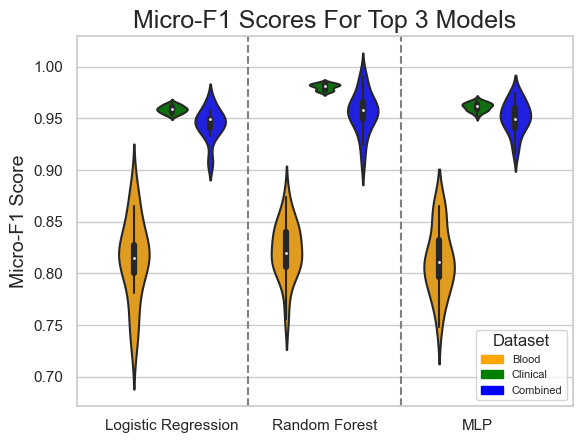

In [63]:
plot_f1_scores(
    [
        model_results["blood_lr_mrmr"]["f1"],
        model_results["clinical_lr_mrmr"]["f1"],
        model_results["combined_lr_mrmr"]["f1"],
        model_results["blood_rf"]["f1"],
        model_results["clinical_rf"]["f1"],
        model_results["combined_rf"]["f1"],
        model_results["blood_mlp_mrmr"]["f1"],
        model_results["clinical_mlp_mrmr"]["f1"],
        model_results["combined_mlp_mrmr"]["f1"],
    ],
    title="Micro-F1 Scores For Top 3 Models",
    ylabel="Micro-F1 Score",
    models=["Logistic Regression", "Random Forest", "MLP"],
    pad=3,
    png=f"{PLOTS}/Micro-F1 Score Comparisons"
)

## Plot feature importance scores from MRMR and random forest

In [ ]:
blood_rf_scores, blood_rf_features = model_results["blood_rf"]["importance"], model_results["blood_rf"]["features"]
clinical_rf_scores, clinical_rf_features = model_results["clinical_rf"]["importance"], model_results["clinical_rf"]["features"]
combined_rf_scores, combined_rf_features = model_results["combined_rf"]["importance"], model_results["combined_rf"]["features"]

plot_mrmr_and_rf(blood_mrmr_scores, blood_rf_scores, blood_rf_features)
plot_mrmr_and_rf(clinical_mrmr_scores, clinical_rf_scores, clinical_rf_features)
plot_mrmr_and_rf(combined_mrmr_scores, combined_rf_scores, combined_rf_features)

## Run the same steps on the clinical data containing MCI patients

In [ ]:
clinical_lr_mci_mrmr_model = run_logistic_regression(clinical_only_subset_mci, num_iters=20, pkl=f"{MODELS}/Clinical LR with MCI and MRMR.pkl")

In [45]:
clinical_lr_mci_mrmr = evaluate_logistic_regression(f"{MODELS}/Clinical LR with MCI and MRMR.pkl")

Average micro-F1 score: 0.8032091097308488
Average confusion matrix:
[[ 873.05   45.65   52.8 ]
 [  16.4  1269.9    89.95]
 [  77.5   288.    184.75]]


In [48]:
clinical_rf_mci_model = run_random_forest(clinical_only_mci, num_iters=20, pkl=f"{MODELS}/Clinical RF with MCI.pkl")

In [52]:
clinical_rf_mci = evaluate_random_forest(f"{MODELS}/Clinical RF with MCI.pkl")

Average micro-F1 score: 0.8600931677018633
Average confusion matrix:
[[ 926.9    14.15   33.2 ]
 [  12.15 1313.6    50.7 ]
 [  74.55  220.7   252.05]]


In [53]:
clinical_mlp_mci_mrmr_model = run_mlp(clinical_only_subset_mci, num_iters=20, pkl=f"{MODELS}/Clinical MLP with MCI and MRMR.pkl")

In [54]:
clinical_mlp_mci_mrmr = evaluate_mlp(f"{MODELS}/Clinical MLP with MCI and MRMR.pkl")

Average micro-F1 score: 0.8098171152518981
Average confusion matrix:
[[ 870.1    28.25   80.9 ]
 [  19.   1221.1   131.4 ]
 [  78.1   213.5   255.65]]


In [64]:
mci_model_results = {
    "lr_mci_mrmr": clinical_lr_mci_mrmr,
    "rf_mci": clinical_rf_mci,
    "mlp_mci_mrmr": clinical_mlp_mci_mrmr,
}

with open(f"{MODELS}/MCI Model Results.pkl", "wb") as handle:
    pickle.dump(mci_model_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [65]:
with open(f"{MODELS}/MCI Model Results.pkl", "rb") as handle:
    mci_model_results = pickle.load(handle)

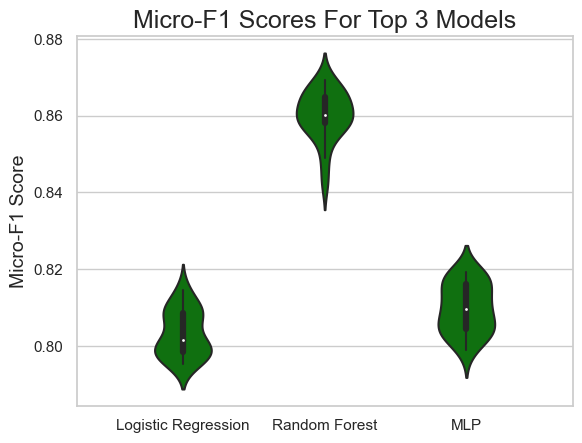

In [68]:
plot_mci_f1_scores(
    [
        mci_model_results["lr_mci_mrmr"]["f1"],
        mci_model_results["rf_mci"]["f1"],
        mci_model_results["mlp_mci_mrmr"]["f1"]
    ],
    title="Micro-F1 Scores For Top 3 Models",
    ylabel="Micro-F1 Score",
    models=["Logistic Regression", "Random Forest", "MLP"],
    pad=1
)

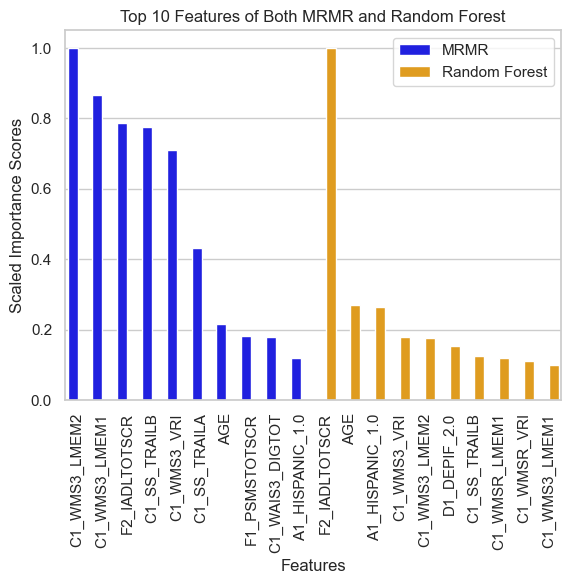

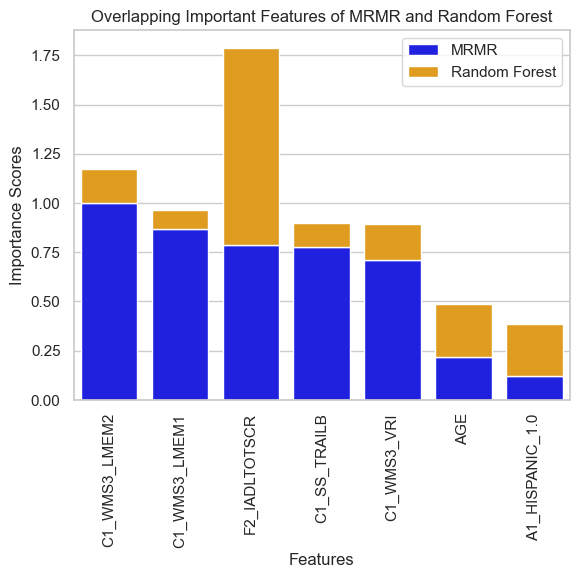

In [71]:
clinical_rf_scores, clinical_rf_features = mci_model_results["rf_mci"]["importance"], mci_model_results["rf_mci"]["features"]
plot_mrmr_and_rf(clinical_mrmr_scores, clinical_rf_scores, clinical_rf_features)